## Dipendenze

In [1]:
!pip install -r requirements.txt

# Librerie

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Importo i Dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Esploro i Dataset 

In [4]:
#Features
list(train)

['No-show',
 'PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received']

In [5]:
#Controllo quanti sono i valori mancanti di Train
print(train.isnull().sum())

print("\n***************\n")

#Controllo quanti sono i valori mancanti di Test
print(test.isnull().sum())

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

***************

No-show           0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64


In [6]:
#Osserviamo la tipologia delle features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70736 entries, 0 to 70735
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         70736 non-null  object 
 1   PatientId       70736 non-null  float64
 2   AppointmentID   70736 non-null  int64  
 3   Gender          70736 non-null  object 
 4   ScheduledDay    70736 non-null  object 
 5   AppointmentDay  70736 non-null  object 
 6   Age             70736 non-null  int64  
 7   Neighbourhood   70736 non-null  object 
 8   Scholarship     70736 non-null  int64  
 9   Hipertension    70736 non-null  int64  
 10  Diabetes        70736 non-null  int64  
 11  Alcoholism      70736 non-null  int64  
 12  Handcap         70736 non-null  int64  
 13  SMS_received    70736 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 7.6+ MB


In [7]:
#Rapido sguardo al Dataset Train
pd.set_option('max_columns', None)
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,Yes,1.476612e+11,5679466,F,2016-05-10T09:57:55Z,2016-05-17T00:00:00Z,44,CARATOÍRA,0,0,0,0,0,0
1,Yes,5.163147e+14,5571658,F,2016-04-12T09:24:13Z,2016-05-16T00:00:00Z,11,MARIA ORTIZ,0,0,0,0,0,0
2,No,2.488843e+12,5690749,F,2016-05-12T10:35:23Z,2016-05-16T00:00:00Z,46,JARDIM CAMBURI,0,0,0,0,0,0
3,Yes,9.618864e+14,5511964,F,2016-03-28T08:24:33Z,2016-05-06T00:00:00Z,75,JESUS DE NAZARETH,0,1,1,0,0,1
4,No,4.836462e+11,5750314,F,2016-05-31T08:44:06Z,2016-06-01T00:00:00Z,83,SANTA MARTHA,0,1,1,0,0,0


## Gestisco le date e gli orari 

In [8]:
# Converto ScheduledDay e AppointmentDay a datetime64
train.ScheduledDay = train.ScheduledDay.apply(np.datetime64)
train.AppointmentDay = train.AppointmentDay.apply(np.datetime64)

test.ScheduledDay = test.ScheduledDay.apply(np.datetime64)
test.AppointmentDay = test.AppointmentDay.apply(np.datetime64)

In [9]:
#Le date e gli orari organizzati in questo modo non sono molto utili.

#Il tempo di attesa potrebbe essere una feature importante
train['WaitTime'] = (train.AppointmentDay.dt.date - train.ScheduledDay.dt.date).dt.days
test['WaitTime'] = (test.AppointmentDay.dt.date - test.ScheduledDay.dt.date).dt.days

#Ho pensato che anche il giorno della settimana in cui cade l'appuntamento possa incidere sulla soluzione
train['AppointmentDayofWeek'] = train.AppointmentDay.dt.weekday
test['AppointmentDayofWeek'] = test.AppointmentDay.dt.weekday

## Eliminazione record caratterizzati da errori

In [10]:
train.head()

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitTime,AppointmentDayofWeek
0,Yes,1.476612e+11,5679466,F,2016-05-10 09:57:55,2016-05-17,44,CARATOÍRA,0,0,0,0,0,0,7,1
1,Yes,5.163147e+14,5571658,F,2016-04-12 09:24:13,2016-05-16,11,MARIA ORTIZ,0,0,0,0,0,0,34,0
2,No,2.488843e+12,5690749,F,2016-05-12 10:35:23,2016-05-16,46,JARDIM CAMBURI,0,0,0,0,0,0,4,0
3,Yes,9.618864e+14,5511964,F,2016-03-28 08:24:33,2016-05-06,75,JESUS DE NAZARETH,0,1,1,0,0,1,39,4
4,No,4.836462e+11,5750314,F,2016-05-31 08:44:06,2016-06-01,83,SANTA MARTHA,0,1,1,0,0,0,1,2


In [11]:
#Elimino dal Train Set e dal Test Set, casi in cui 
#l'appuntamento è stato registrato dopo il giorno effettivo in cui è avvenuto l'appuntamento

condizione1 = train[(train['AppointmentDay']<train['ScheduledDay'].dt.date)]
condizione2 = test[(test['AppointmentDay']<test['ScheduledDay'].dt.date)]

train = train.drop(condizione1.index, axis=0)
test = test.drop(condizione2.index, axis=0)

## Divisione fasce di età 

In [12]:
#Questa trasformazione permetterà al modello di ragionare con un minor numero di valori discreti

def age_category(age):
    if (age<=20):
        return 0
    elif (age>20 and age<=39):
        return 1
    elif (age>39 and age<=59):
        return 2
    elif (age>59 and age<=79):
        return 3
    elif (age>79):
        return 4
    
train['Age']= train.apply(lambda x: age_category(x['Age']), axis=1)
test['Age']= test.apply(lambda x: age_category(x['Age']), axis=1)

# Mapping 

In [13]:
labelEncoder_X = LabelEncoder()
train['Neighbourhood']=labelEncoder_X.fit_transform(train['Neighbourhood'])
test['Neighbourhood']=labelEncoder_X.fit_transform(test['Neighbourhood'])

noshow_mapping = {"Yes": 1,"No": 0}
train['No-show'] = train['No-show'].map(noshow_mapping)
test['No-show'] = test['No-show'].map(noshow_mapping)

gender_mapping = {"F": 0, "M": 1}
train['Gender'] = train['Gender'].map(gender_mapping)
test['Gender'] = test['Gender'].map(gender_mapping)

### Converto in float 

In [14]:
train['PatientId'] = pd.to_numeric(train['PatientId'], errors = 'coerce')
test['PatientId'] = pd.to_numeric(test['PatientId'], errors = 'coerce')

train.dtypes

No-show                          int64
PatientId                      float64
AppointmentID                    int64
Gender                           int64
ScheduledDay            datetime64[ns]
AppointmentDay          datetime64[ns]
Age                              int64
Neighbourhood                    int32
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
WaitTime                         int64
AppointmentDayofWeek             int64
dtype: object

## Feature Selection

In [15]:
#Elimino le feature 'AppointmentID', 'AppointmentDay' e 'ScheduledDay' perchè non sono utili per la nostra previsione

train = train.drop(['AppointmentID', 'AppointmentDay', 'ScheduledDay'], axis=1)
test = test.drop(['AppointmentID', 'AppointmentDay', 'ScheduledDay'], axis=1)

## Separo i Dataset dalle rispettive Label 

In [16]:
y_train = train['No-show']           # vector of labels (dependent variable)
X_train = train.drop(['No-show'], axis=1)      # remove the dependent variable from the dataframe Train

y_test = test['No-show']           # vector of labels (dependent variable)
X_test = test.drop(['No-show'], axis=1)      # remove the dependent variable from the dataframe Test  

# Modello 

Accuracy: 80.31


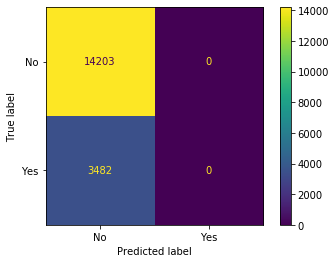

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

model = LogisticRegression(random_state=0, max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_logregress = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:"  , acc_logregress)

plot_confusion_matrix(model, X_test, y_test, values_format='n', display_labels=['No','Yes'])
plt.show()